<a href="https://colab.research.google.com/github/Rishabh672003/Learning-machine-learning/blob/main/Perceptron-SciKit-Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Campus Placement Prediction Using Perceptron Machine Learning Algorithm


In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_sco
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
scaler = StandardScaler()

In [125]:
url = "https://raw.githubusercontent.com/Rishabh672003/Learning-machine-learning/main/Placement_Data_Full_Class.csv"
df = pd.read_csv(url)
# df['workex'] = df['workex'].map({'Yes': 1, 'No': 0})

In [126]:
df.shape

(215, 15)

In [127]:
df.head

<bound method NDFrame.head of      sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0     Sci&Tech  

In [128]:
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [129]:
# Create an instance of LabelEncoder
le = LabelEncoder()

# List of columns to encode
cols = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'specialisation', 'status', 'workex']

# Apply LabelEncoder to each column in cols
for col in cols:
   df[col] = le.fit_transform(df[col])

df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,NaN
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [130]:
# we are only concerned with these values
X = df.iloc[:, :13]
y = df['status']

In [131]:
class_distribution = df["status"].value_counts()
class_distribution

1    148
0     67
Name: status, dtype: int64

In [132]:
scaler.fit_transform(X)

array([[-1.72401341,  0.73943397, -0.02808697, ..., -1.29109087,
         1.12390297, -0.59764672],
       [-1.70790113,  0.73943397,  1.11336869, ...,  1.08715679,
        -0.88975652,  0.6876202 ],
       [-1.69178886,  0.73943397, -0.21323793, ...,  0.21890765,
        -0.88975652, -0.76947385],
       ...,
       [ 1.69178886,  0.73943397, -0.02808697, ..., -0.98909117,
        -0.88975652,  1.27870553],
       [ 1.70790113, -1.35238581,  0.61994138, ..., -0.15859198,
         1.12390297, -0.35193393],
       [ 1.72401341,  0.73943397, -0.49096436, ...,  1.27590661,
         1.12390297, -0.3536522 ]])

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 13), (65, 13), (150,), (65,))

In [139]:
P = Perceptron(max_iter=10000)
P.fit(X_train,y_train)

Perceptron(max_iter=10000)

In [140]:
# dont run this as the accuracy decreases sometimes
print(f"The Accuracy of the model is: {P.score(X_test, y_test)*100}")

The Accuracy of the model is: 87.6923076923077


In [136]:
P.intercept_[0], P.coef_[0][0]

(-29.0, 20.0)

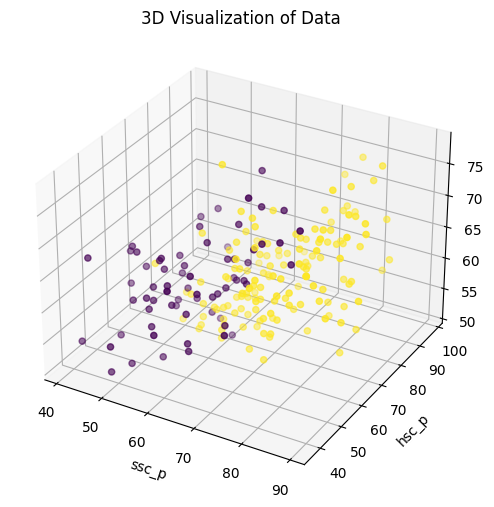

In [137]:
features_to_visualize = ['ssc_p', 'hsc_p', 'mba_p']

# Separate selected features and target variable
X_3d = df[features_to_visualize]
y = df['status']

# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color-coded target variable values
ax.scatter(X_3d['ssc_p'], X_3d['hsc_p'], X_3d['mba_p'], c=y, cmap='viridis')

# Add labels for axes
ax.set_xlabel('ssc_p')
ax.set_ylabel('hsc_p')
ax.set_zlabel('mba_p')

# Customize plot appearance (optional)
ax.set_title('3D Visualization of Data')

plt.show()